In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [175]:
df = pd.read_csv('../Dataset/feature_output_10k_final.csv')

In [176]:
df

,Unnamed: 0.1,Unnamed: 0,text,generated,length,label,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,split_text,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,0,321478,Becoming your on self is a crucial aspect of a...,1.0,2276,AI,0.038,0.683,0.279,0.9987,0.590000,57.91,10.6,9.079517,"['Becoming', 'your', 'on', 'self', 'is', 'a', ...",27,21,20.315789,60,1
1,1,49275,Phones and Driving\n\nPhones and techknowledge...,0.0,2381,Human,0.092,0.819,0.090,-0.5986,0.534348,81.33,5.7,33.769810,"['Phones', 'and', 'Driving\n\nPhones', 'and', ...",29,11,14.419355,69,4
2,2,123215,"You should be a Seagoing Cowboy.\n\nIt is fun,...",0.0,827,Human,0.018,0.755,0.227,0.9894,0.455934,95.67,2.3,21.495440,"['You', 'should', 'be', 'a', 'Seagoing', 'Cowb...",6,3,8.222222,28,4
3,3,190730,"As an 8th grader, I believe that committing to...",1.0,2325,AI,0.006,0.811,0.184,0.9956,0.543547,57.10,10.9,7.064874,"['As', 'an', '8th', 'grader,', 'I', 'believe',...",20,28,22.222222,54,2
4,4,329038,"You should join the Seagoing Cowboys because, ...",0.0,1183,Human,0.034,0.789,0.177,0.9886,0.514757,85.28,4.2,50.013187,"['You', 'should', 'join', 'the', 'Seagoing', '...",16,10,10.666667,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,188710,Seeking advice from multiple people when facin...,1.0,1987,AI,0.051,0.785,0.164,0.9892,0.482265,40.58,13.1,34.399616,"['Seeking', 'advice', 'from', 'multiple', 'peo...",12,10,20.466667,28,2
9996,9996,9688,"The Face on Mars, is it really what NASA says ...",0.0,2374,Human,0.023,0.938,0.039,0.8044,0.443304,74.22,8.4,42.247635,"['The', 'Face', 'on', 'Mars,', 'is', 'it', 're...",20,22,19.954545,40,10
9997,9997,31949,"Title: Exploring Venus\n\nVenus, the second pl...",1.0,2470,AI,0.022,0.926,0.052,0.9022,0.494501,48.03,12.3,17.237017,"['Title:', 'Exploring', 'Venus\n\nVenus,', 'th...",21,6,21.444444,59,9
9998,9998,481082,"Hey, Mrs. Smith! Here's my essay on the benefi...",1.0,2028,AI,0.064,0.719,0.217,0.9968,0.457093,77.10,9.4,9.456690,"['Hey,', 'Mrs.', 'Smith!', ""Here's"", 'my', 'es...",25,22,24.125000,61,5


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               10000 non-null  int64  
 1   Unnamed: 0                 10000 non-null  int64  
 2   text                       10000 non-null  object 
 3   generated                  10000 non-null  float64
 4   length                     10000 non-null  int64  
 5   label                      10000 non-null  object 
 6   neg                        10000 non-null  float64
 7   neu                        10000 non-null  float64
 8   pos                        10000 non-null  float64
 9   compound                   10000 non-null  float64
 10  subjectivity_score         10000 non-null  float64
 11  flesch_reading_ease_score  10000 non-null  float64
 12  flesch_kincaid_grade       10000 non-null  float64
 13  Perplexity Score           10000 non-null  floa

In [178]:
features_to_divide = ['no_discourse_markers','no_pronouns','grammatical_errors','named_entity_counts']
df[features_to_divide] = df[features_to_divide].div(df['length'],axis=0)

In [179]:
columns_to_drop = [0, 1, 2, 4, 5, 14] 
df = df.drop(columns=df.columns[columns_to_drop])
df

,generated,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,1.0,0.038,0.683,0.279,0.9987,0.590000,57.91,10.6,9.079517,0.011863,0.009227,20.315789,0.026362,0.000439
1,0.0,0.092,0.819,0.090,-0.5986,0.534348,81.33,5.7,33.769810,0.012180,0.004620,14.419355,0.028979,0.001680
2,0.0,0.018,0.755,0.227,0.9894,0.455934,95.67,2.3,21.495440,0.007255,0.003628,8.222222,0.033857,0.004837
3,1.0,0.006,0.811,0.184,0.9956,0.543547,57.10,10.9,7.064874,0.008602,0.012043,22.222222,0.023226,0.000860
4,0.0,0.034,0.789,0.177,0.9886,0.514757,85.28,4.2,50.013187,0.013525,0.008453,10.666667,0.021133,0.003381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.051,0.785,0.164,0.9892,0.482265,40.58,13.1,34.399616,0.006039,0.005033,20.466667,0.014092,0.001007
9996,0.0,0.023,0.938,0.039,0.8044,0.443304,74.22,8.4,42.247635,0.008425,0.009267,19.954545,0.016849,0.004212
9997,1.0,0.022,0.926,0.052,0.9022,0.494501,48.03,12.3,17.237017,0.008502,0.002429,21.444444,0.023887,0.003644
9998,1.0,0.064,0.719,0.217,0.9968,0.457093,77.10,9.4,9.456690,0.012327,0.010848,24.125000,0.030079,0.002465


In [180]:
X = df.drop(columns = ['generated'])
y = df.generated

X_features = X.columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=28)

In [182]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100,1000,10000],  # Regularization parameter
    'max_iter': [100,500,1000, 5000, 10000],  # Maximum number of iterations
    # 'solver': ['liblinear','sag','lbfgs', 'saga', 'newton-cg']  # Solver algorithm
}

# Create a logistic regression classifier
log_reg = LogisticRegression(random_state=28)

# Instantiate GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a logistic regression model with the best hyperparameters
log_reg_model = LogisticRegression(**best_params,random_state=28)
log_reg_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 1, 'max_iter': 100}


LogisticRegression(C=1, random_state=28)

Best Parameters: {'n_estimators': 100}

In [183]:

y_pred = log_reg_model.predict(X_test)

In [184]:
def evaluate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1, conf_matrix = evaluate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8645
Precision: 0.8389355742296919
Recall: 0.7933774834437086
F1 Score: 0.8155207624234172
Confusion Matrix:
[[1130  115]
 [ 156  599]]


## With New Data for Paraphrase Attack

In [186]:
new_df = pd.read_csv('../Paraphrase/ai_human_with_features4.csv')
new_df

,Unnamed: 0.1,Unnamed: 0,text,generated,paraphrased,length,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,split_text,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,0,343280.0,Meditation and mindfulness Practices have beco...,1.0,Meditation and mindfulness practices are becom...,3420,0.043,0.704,0.253,0.9987,0.474103,33.14,13.9,7.498202,"['Meditation', 'and', 'mindfulness', 'practice...",37,2,20.000000,27,2
1,1,416895.0,"Dear Principal Johnson, \n\nI am writing to sh...",1.0,"Dear Principal Johnson,\n\nI am writing to exp...",2254,0.008,0.762,0.230,0.9973,0.427652,44.95,11.4,13.276897,"['Dear', 'Principal', 'Johnson,\n\nI', 'am', '...",19,6,17.368421,25,3
2,2,34588.0,"Title: Exploring Venus\n\nVenus, the second pl...",1.0,"The planet Venus, located second from the Sun,...",2348,0.033,0.888,0.079,0.9118,0.651835,52.19,10.7,11.857075,"['The', 'planet', 'Venus,', 'located', 'second...",15,7,17.750000,35,6
3,3,21441.0,"In the modern world, it is widely accepted tha...",1.0,"In today's world, it is widely believed that i...",1082,0.082,0.652,0.266,0.9888,0.542460,61.77,9.1,12.352642,"['In', ""today's"", 'world,', 'it', 'is', 'widel...",6,7,16.000000,33,2
4,4,462302.0,The debate surrounding the issue of cellphones...,1.0,The discussion about whether students should b...,649,0.101,0.788,0.111,0.0258,0.607143,43.53,12.0,13.510089,"['The', 'discussion', 'about', 'whether', 'stu...",4,0,16.000000,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304689,NaN,"Students may say inactivity is the Gay to go, ...",0.0,"Students may say inactivity is the Gay to go, ...",1784,0.071,0.831,0.097,0.8916,0.423809,64.44,10.1,54.914600,"['Students', 'may', 'say', 'inactivity', 'is',...",20,95,21.666667,47,2
1996,348914,NaN,The author supports their topic by giving fact...,0.0,The author supports their topic by giving fact...,1108,0.130,0.780,0.090,-0.9287,0.412269,60.52,13.7,99.510262,"['The', 'author', 'supports', 'their', 'topic'...",12,51,30.714286,34,3
1997,177458,NaN,"Dear Senator,\n\nI personally think that the e...",0.0,"Dear Senator,\n\nI personally think that the e...",1821,0.068,0.799,0.134,0.9766,0.516330,66.98,9.2,18.948233,"['Dear', 'Senator,\n\nI', 'personally', 'think...",8,81,19.625000,34,1
1998,425742,NaN,"If you could, would you wait to live oz a diff...",0.0,"If you could, would you wait to live oz a diff...",3417,0.028,0.815,0.158,0.9971,0.564153,58.01,10.5,41.054386,"['If', 'you', 'could,', 'would', 'you', 'wait'...",13,167,21.444444,60,9


In [187]:
new_df[features_to_divide] = new_df[features_to_divide].div(new_df['length'],axis=0)

In [188]:
columns_to_drop = [0,1,2,4,5,14] 
new_df = new_df.drop(columns=new_df.columns[columns_to_drop])
new_df

,generated,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,1.0,0.043,0.704,0.253,0.9987,0.474103,33.14,13.9,7.498202,0.010819,0.000585,20.000000,0.007895,0.000585
1,1.0,0.008,0.762,0.230,0.9973,0.427652,44.95,11.4,13.276897,0.008429,0.002662,17.368421,0.011091,0.001331
2,1.0,0.033,0.888,0.079,0.9118,0.651835,52.19,10.7,11.857075,0.006388,0.002981,17.750000,0.014906,0.002555
3,1.0,0.082,0.652,0.266,0.9888,0.542460,61.77,9.1,12.352642,0.005545,0.006470,16.000000,0.030499,0.001848
4,1.0,0.101,0.788,0.111,0.0258,0.607143,43.53,12.0,13.510089,0.006163,0.000000,16.000000,0.013867,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.071,0.831,0.097,0.8916,0.423809,64.44,10.1,54.914600,0.011211,0.053251,21.666667,0.026345,0.001121
1996,0.0,0.130,0.780,0.090,-0.9287,0.412269,60.52,13.7,99.510262,0.010830,0.046029,30.714286,0.030686,0.002708
1997,0.0,0.068,0.799,0.134,0.9766,0.516330,66.98,9.2,18.948233,0.004393,0.044481,19.625000,0.018671,0.000549
1998,0.0,0.028,0.815,0.158,0.9971,0.564153,58.01,10.5,41.054386,0.003805,0.048873,21.444444,0.017559,0.002634


In [189]:
X_new = new_df.drop(columns = ['generated'])
y_new = new_df.generated

X_new_scaled = scaler.transform(X_new)

In [190]:
pred = log_reg_model.predict(X_new_scaled)

In [191]:
def evaluate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1, conf_matrix = evaluate_metrics(y_new, pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9745
Precision: 1.0
Recall: 0.949
F1 Score: 0.9738327347357619
Confusion Matrix:
[[1000    0]
 [  51  949]]


## Investigation

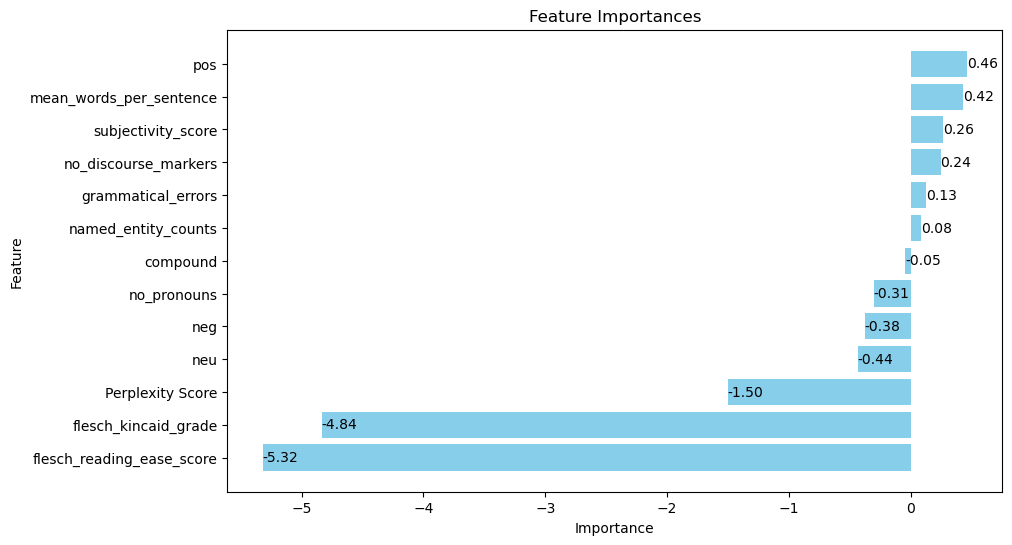

In [192]:
import matplotlib.pyplot as plt

feature_importances = log_reg_model.coef_[0]
importance_df = pd.DataFrame({'Feature': X_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Add labels for each bar
for bar, value in zip(bars, importance_df['Importance']):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

In [193]:
ai_df = df[df['generated'] == 1]
ai_df.drop(columns=['generated'], inplace=True)
ai_df_scaled = scaler.transform(ai_df)
ai_df_scaled = pd.DataFrame(ai_df_scaled, columns=ai_df.columns)

/var/folders/w8/l666v1c93q9gjlp5ndjpb0n00000gn/T/ipykernel_23099/4193810222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_df.drop(columns=['generated'], inplace=True)


In [194]:
human_train_df = df[df['generated'] == 0 ]
human_train_df.drop(columns=['generated'], inplace=True)
human_train_df_scaled = scaler.transform(human_train_df)
human_train_df_scaled = pd.DataFrame(human_train_df_scaled, columns=human_train_df.columns)

/var/folders/w8/l666v1c93q9gjlp5ndjpb0n00000gn/T/ipykernel_23099/3465069141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_train_df.drop(columns=['generated'], inplace=True)


In [195]:
para_df = new_df[new_df['generated']==1]
para_df.drop(columns=['generated'], inplace=True)
para_df_scaled = scaler.transform(para_df)
para_df_scaled = pd.DataFrame(para_df_scaled, columns=para_df.columns)

/var/folders/w8/l666v1c93q9gjlp5ndjpb0n00000gn/T/ipykernel_23099/3802474222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_df.drop(columns=['generated'], inplace=True)


In [196]:
human_new_df = new_df[new_df['generated']==0]
human_new_df.drop(columns=['generated'], inplace=True)
human_new_df_scaled = scaler.transform(human_new_df)
human_new_df_scaled = pd.DataFrame(human_new_df_scaled, columns=human_new_df.columns)

/var/folders/w8/l666v1c93q9gjlp5ndjpb0n00000gn/T/ipykernel_23099/158888443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_new_df.drop(columns=['generated'], inplace=True)


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


################ human_new #################
min 7.886386871337891
max 351.1122436523437
mean 41.97299424648285
std 30.95536258393721
################# human_train ###################
min 2.0808684825897217
max 362.579345703125
mean 43.122012976255
std 30.858531783976712
################# ai ###################
min 3.69225001335144
max 534.4736328125
mean 20.30588838013888
std 25.809236820492632
################# para ###################
min 4.52067756652832
max 80.97077178955078
mean 13.045842966079713
std 5.289575265667629


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


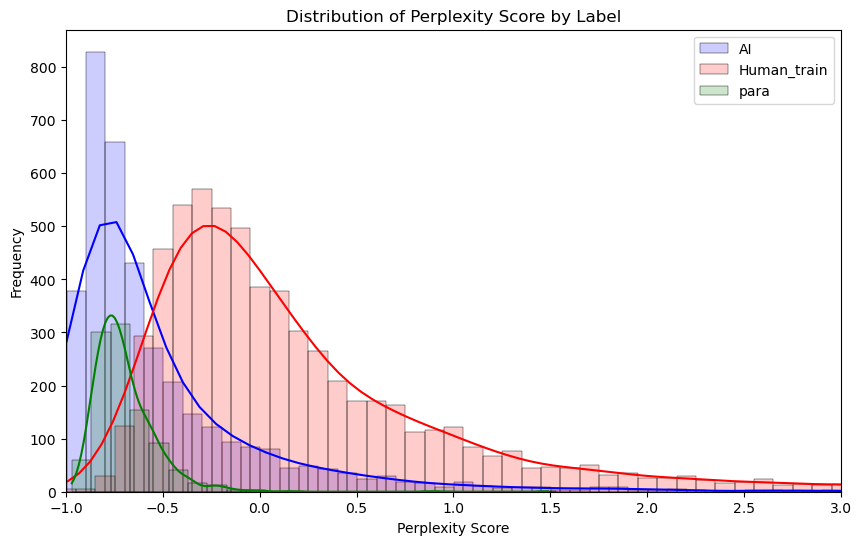

In [197]:
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

print("################ human_new #################")
print(f"min {human_new_df['Perplexity Score'].min()}")
print(f"max {human_new_df['Perplexity Score'].max()}")
print(f"mean {human_new_df['Perplexity Score'].mean()}")
print(f"std {human_new_df['Perplexity Score'].std()}")
print("################# human_train ###################")
print(f"min {human_train_df['Perplexity Score'].min()}")
print(f"max {human_train_df['Perplexity Score'].max()}")
print(f"mean {human_train_df['Perplexity Score'].mean()}")
print(f"std {human_train_df['Perplexity Score'].std()}")
print("################# ai ###################")
print(f"min {ai_df['Perplexity Score'].min()}")
print(f"max {ai_df['Perplexity Score'].max()}")
print(f"mean {ai_df['Perplexity Score'].mean()}")
print(f"std {ai_df['Perplexity Score'].std()}")
print("################# para ###################")
print(f"min {para_df['Perplexity Score'].min()}")
print(f"max {para_df['Perplexity Score'].max()}")
print(f"mean {para_df['Perplexity Score'].mean()}")
print(f"std {para_df['Perplexity Score'].std()}")


# Plot histogram or density plot for label 0
sns.histplot(ai_df_scaled['Perplexity Score'], kde=True, color='blue', label='AI',binwidth=0.1, alpha = 0.2)

# sns.histplot(human_new_df_scaled['Perplexity Score'], kde=True, color='purple', label='human_new',binwidth=0.1,alpha = 0.2)

# Plot histogram or density plot for label 1
sns.histplot(human_train_df_scaled['Perplexity Score'], kde=True, color='red', label='Human_train',binwidth=0.1,alpha = 0.2)

sns.histplot(para_df_scaled['Perplexity Score'], kde=True, color='green', label='para',binwidth=0.1,alpha = 0.2)

# Add labels and title
plt.xlabel('Perplexity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Perplexity Score by Label')
plt.xlim(-1, 3)
# Add legend
plt.legend()

# Show plot
plt.show()

################ human_new #################
min 2.9
max 148.3
mean 9.155599999999998
std 7.214855700759571
################# human_train ###################
min 1.6
max 146.0
mean 8.878153260352214
std 4.458023153661575
################# ai ###################
min 1.8
max 21.9
mean 10.537679199350826
std 2.8532354843773797
################# para ###################
min 3.4
max 20.4
mean 10.648200000000001
std 2.3957956082680765


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


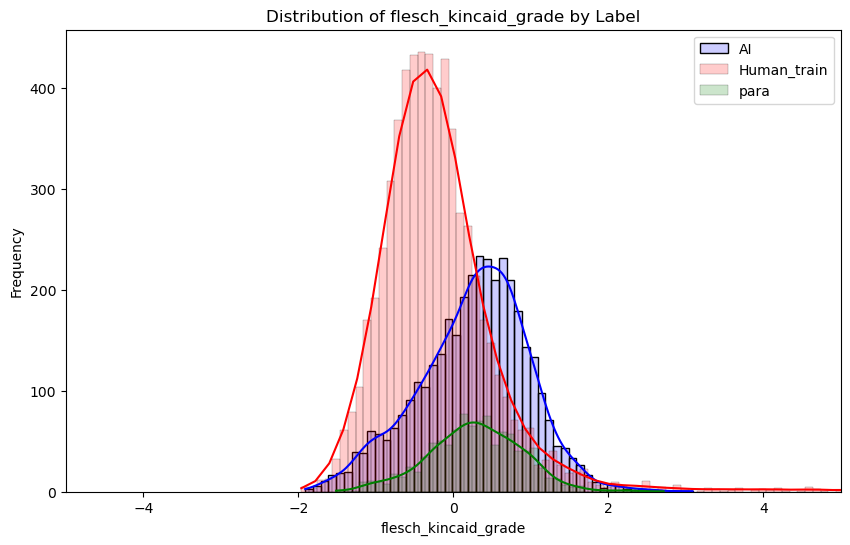

In [198]:
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

print("################ human_new #################")
print(f"min {human_new_df['flesch_kincaid_grade'].min()}")
print(f"max {human_new_df['flesch_kincaid_grade'].max()}")
print(f"mean {human_new_df['flesch_kincaid_grade'].mean()}")
print(f"std {human_new_df['flesch_kincaid_grade'].std()}")
print("################# human_train ###################")
print(f"min {human_train_df['flesch_kincaid_grade'].min()}")
print(f"max {human_train_df['flesch_kincaid_grade'].max()}")
print(f"mean {human_train_df['flesch_kincaid_grade'].mean()}")
print(f"std {human_train_df['flesch_kincaid_grade'].std()}")
print("################# ai ###################")
print(f"min {ai_df['flesch_kincaid_grade'].min()}")
print(f"max {ai_df['flesch_kincaid_grade'].max()}")
print(f"mean {ai_df['flesch_kincaid_grade'].mean()}")
print(f"std {ai_df['flesch_kincaid_grade'].std()}")
print("################# para ###################")
print(f"min {para_df['flesch_kincaid_grade'].min()}")
print(f"max {para_df['flesch_kincaid_grade'].max()}")
print(f"mean {para_df['flesch_kincaid_grade'].mean()}")
print(f"std {para_df['flesch_kincaid_grade'].std()}")

# Plot histogram or density plot for label 0
sns.histplot(ai_df_scaled['flesch_kincaid_grade'], kde=True, color='blue', label='AI',binwidth=0.1, alpha = 0.2)

# sns.histplot(human_new_df_scaled['flesch_kincaid_grade'], kde=True, color='purple', label='human_new',binwidth=0.1, alpha = 0.2)

# Plot histogram or density plot for label 1
sns.histplot(human_train_df_scaled['flesch_kincaid_grade'], kde=True, color='red', label='Human_train',binwidth=0.1, alpha = 0.2)

sns.histplot(para_df_scaled['flesch_kincaid_grade'], kde=True, color='green', label='para',binwidth=0.1, alpha = 0.2)

# Add labels and title
plt.xlabel('flesch_kincaid_grade')
plt.ylabel('Frequency')
plt.title('Distribution of flesch_kincaid_grade by Label')
plt.xlim(-5, 5)
# Add legend
plt.legend()

# Show plot
plt.show()

################ human_new #################
min -289.87
max 97.33
mean 68.82759999999999
std 19.601019805546272
################# human_train ###################
min -272.95
max 102.71
mean 69.51220529906394
std 13.43832062462216
################# ai ###################
min 4.68
max 98.65
mean 53.79399513118745
std 15.765375080593355
################# para ###################
min -5.38
max 92.63
mean 50.87908
std 13.771413085517835


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


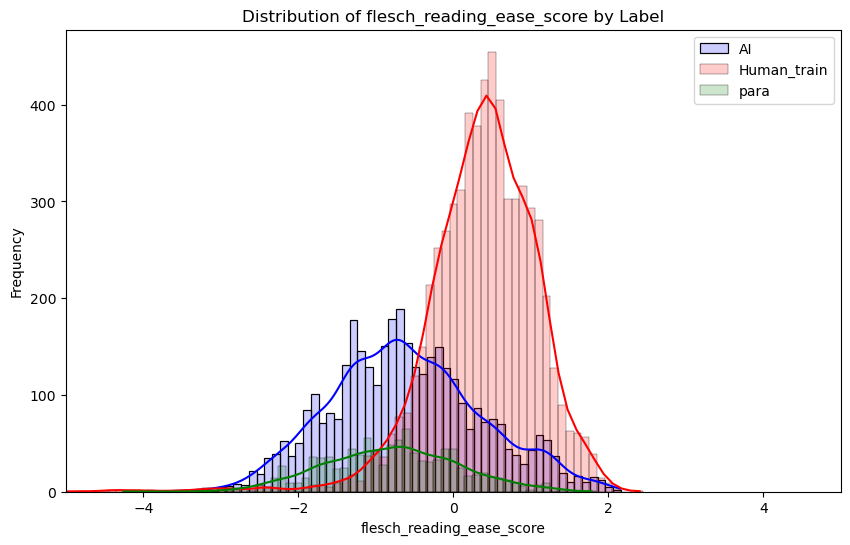

In [199]:
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

print("################ human_new #################")
print(f"min {human_new_df['flesch_reading_ease_score'].min()}")
print(f"max {human_new_df['flesch_reading_ease_score'].max()}")
print(f"mean {human_new_df['flesch_reading_ease_score'].mean()}")
print(f"std {human_new_df['flesch_reading_ease_score'].std()}")
print("################# human_train ###################")
print(f"min {human_train_df['flesch_reading_ease_score'].min()}")
print(f"max {human_train_df['flesch_reading_ease_score'].max()}")
print(f"mean {human_train_df['flesch_reading_ease_score'].mean()}")
print(f"std {human_train_df['flesch_reading_ease_score'].std()}")
print("################# ai ###################")
print(f"min {ai_df['flesch_reading_ease_score'].min()}")
print(f"max {ai_df['flesch_reading_ease_score'].max()}")
print(f"mean {ai_df['flesch_reading_ease_score'].mean()}")
print(f"std {ai_df['flesch_reading_ease_score'].std()}")
print("################# para ###################")
print(f"min {para_df['flesch_reading_ease_score'].min()}")
print(f"max {para_df['flesch_reading_ease_score'].max()}")
print(f"mean {para_df['flesch_reading_ease_score'].mean()}")
print(f"std {para_df['flesch_reading_ease_score'].std()}")

# Plot histogram or density plot for label 0
sns.histplot(ai_df_scaled['flesch_reading_ease_score'], kde=True, color='blue', label='AI',binwidth=0.1, alpha = 0.2)

# sns.histplot(human_new_df_scaled['flesch_reading_ease_score'], kde=True, color='purple', label='human_new',binwidth=0.1, alpha = 0.2)

# Plot histogram or density plot for label 1
sns.histplot(human_train_df_scaled['flesch_reading_ease_score'], kde=True, color='red', label='Human_train',binwidth=0.1, alpha = 0.2)

sns.histplot(para_df_scaled['flesch_reading_ease_score'], kde=True, color='green', label='para',binwidth=0.1, alpha = 0.2)

# Add labels and title
plt.xlabel('flesch_reading_ease_score')
plt.ylabel('Frequency')
plt.title('Distribution of flesch_reading_ease_score by Label')
plt.xlim(-5, 5)
# Add legend
plt.legend()

# Show plot
plt.show()

################ human_new #################
min 0.021775544388609715
max 0.0793943870014771
mean 0.04926300770759559
std 0.008170394526507741
################# human_train ###################
min 0.0
max 0.028132992327365727
mean 0.007716041994572732
std 0.00460430962485692
################# ai ###################
min 0.0
max 0.023682938617689706
mean 0.004212172278025722
std 0.0033901598324754876
################# para ###################
min 0.0
max 0.015444015444015444
mean 0.0036507179431160396
std 0.0030259950931019507


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


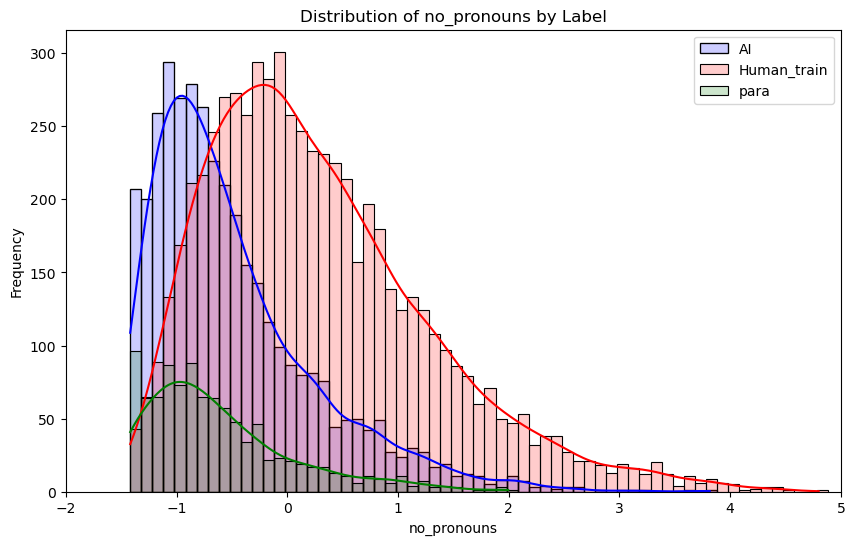

In [200]:
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

print("################ human_new #################")
print(f"min {human_new_df['no_pronouns'].min()}")
print(f"max {human_new_df['no_pronouns'].max()}")
print(f"mean {human_new_df['no_pronouns'].mean()}")
print(f"std {human_new_df['no_pronouns'].std()}")
print("################# human_train ###################")
print(f"min {human_train_df['no_pronouns'].min()}")
print(f"max {human_train_df['no_pronouns'].max()}")
print(f"mean {human_train_df['no_pronouns'].mean()}")
print(f"std {human_train_df['no_pronouns'].std()}")
print("################# ai ###################")
print(f"min {ai_df['no_pronouns'].min()}")
print(f"max {ai_df['no_pronouns'].max()}")
print(f"mean {ai_df['no_pronouns'].mean()}")
print(f"std {ai_df['no_pronouns'].std()}")
print("################# para ###################")
print(f"min {para_df['no_pronouns'].min()}")
print(f"max {para_df['no_pronouns'].max()}")
print(f"mean {para_df['no_pronouns'].mean()}")
print(f"std {para_df['no_pronouns'].std()}")

# Plot histogram or density plot for label 0
sns.histplot(ai_df_scaled['no_pronouns'], kde=True, color='blue', label='AI',binwidth=0.1, alpha = 0.2)

# sns.histplot(human_new_df_scaled['no_pronouns'], kde=True, color='purple', label='human_new',binwidth=0.1, alpha = 0.2)

# Plot histogram or density plot for label 1
sns.histplot(human_train_df_scaled['no_pronouns'], kde=True, color='red', label='Human_train',binwidth=0.1, alpha = 0.2)

sns.histplot(para_df_scaled['no_pronouns'], kde=True, color='green', label='para',binwidth=0.1, alpha = 0.2)

# Add labels and title
plt.xlabel('no_pronouns')
plt.ylabel('Frequency')
plt.title('Distribution of no_pronouns by Label')
plt.xlim(-2, 5)
# Add legend
plt.legend()

# Show plot
plt.show()

/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


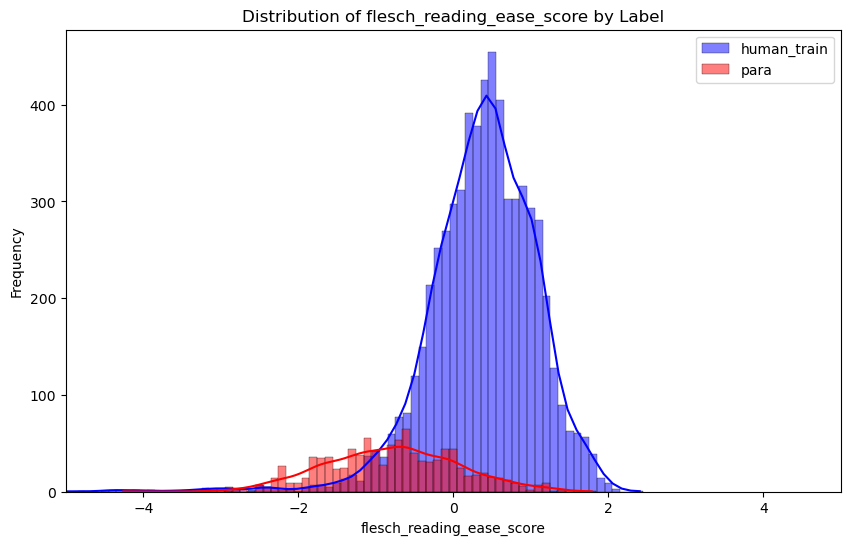

In [201]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram or density plot for label 0
sns.histplot(human_train_df_scaled['flesch_reading_ease_score'], kde=True, color='blue', label='human_train',binwidth=0.1)

# Plot histogram or density plot for label 1
sns.histplot(para_df_scaled['flesch_reading_ease_score'], kde=True, color='red', label='para',binwidth=0.1)

# Add labels and title
plt.xlabel('flesch_reading_ease_score')
plt.ylabel('Frequency')
plt.title('Distribution of flesch_reading_ease_score by Label')
plt.xlim(-5, 5)
# Add legend
plt.legend()

# Show plot
plt.show()